## Image segmentation with CamVid

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [3]:
path = Path('/home/spriyanshu723/biomedical')
path.ls()

[PosixPath('/home/spriyanshu723/biomedical/BUS'),
 PosixPath('/home/spriyanshu723/biomedical/DatasetB.xlsx'),
 PosixPath('/home/spriyanshu723/biomedical/Untitled.ipynb'),
 PosixPath('/home/spriyanshu723/biomedical/mask_adjustment.ipynb'),
 PosixPath('/home/spriyanshu723/biomedical/new_size_GT_Output'),
 PosixPath('/home/spriyanshu723/biomedical/ResNet34.ipynb'),
 PosixPath('/home/spriyanshu723/biomedical/nbs'),
 PosixPath('/home/spriyanshu723/biomedical/new_aug.py'),
 PosixPath('/home/spriyanshu723/biomedical/image_name_from_dataframe.ipynb'),
 PosixPath('/home/spriyanshu723/biomedical/Classification_data'),
 PosixPath('/home/spriyanshu723/biomedical/size_GT_Output'),
 PosixPath('/home/spriyanshu723/biomedical/Data_2class'),
 PosixPath('/home/spriyanshu723/biomedical/size_Output'),
 PosixPath('/home/spriyanshu723/biomedical/mask'),
 PosixPath('/home/spriyanshu723/biomedical/.ipynb_checkpoints'),
 PosixPath('/home/spriyanshu723/biomedical/padding_of_augmented_data.ipynb'),
 PosixPath('/

In [4]:
path_lbl = path/'mask'
path_img = path/'size_Output'

## Subset classes

In [5]:
# path = Path('./data/camvid-small')

# def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

# codes = array(['Sky', 'Building', 'Pole', 'Road', 'Sidewalk', 'Tree',
#     'Sign', 'Fence', 'Car', 'Pedestrian', 'Cyclist', 'Void'])

# src = (SegmentationItemList.from_folder(path)
#        .split_by_folder(valid='val')
#        .label_from_func(get_y_fn, classes=codes))

# bs=8
# data = (src.transform(get_transforms(), tfm_y=True)
#         .databunch(bs=bs)
#         .normalize(imagenet_stats))

## Data

In [6]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/home/spriyanshu723/biomedical/size_Output/000035_0_1565.jpg'),
 PosixPath('/home/spriyanshu723/biomedical/size_Output/000130_0_2065.jpg'),
 PosixPath('/home/spriyanshu723/biomedical/size_Output/000105_0_5646.jpg')]

In [7]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/home/spriyanshu723/biomedical/mask/000035_0_1565.jpg'),
 PosixPath('/home/spriyanshu723/biomedical/mask/000130_0_2065.jpg'),
 PosixPath('/home/spriyanshu723/biomedical/mask/000105_0_5646.jpg')]

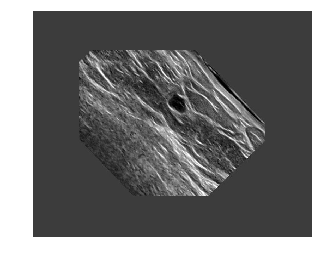

In [8]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [9]:
get_y_fn = lambda x: path_lbl/f'{x.stem}{x.suffix}'

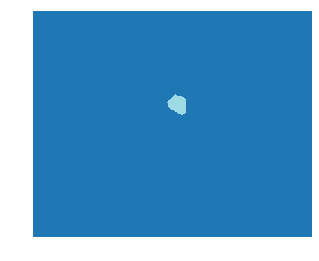

In [10]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [11]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([641, 791]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [12]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['A', 'B'], dtype='<U1')

## Datasets

In [13]:
size = [640, 790]

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=4
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=4, have 16270MB of GPU RAM free


In [14]:
class MySegmentationLabelList(SegmentationLabelList):
  def open(self, fn): return open_mask(fn, div=True)

class MySegmentationItemList(ImageList):
    "`ItemList` suitable for segmentation tasks."
    _label_cls,_square_show_res = MySegmentationLabelList,False


In [15]:
src = (MySegmentationItemList.from_folder(path_img)
       .split_by_rand_pct()
       .label_from_func(get_y_fn, classes=codes))

In [16]:
data = (src.transform(get_transforms(), size=size, tfm_y=True).databunch(bs=bs))

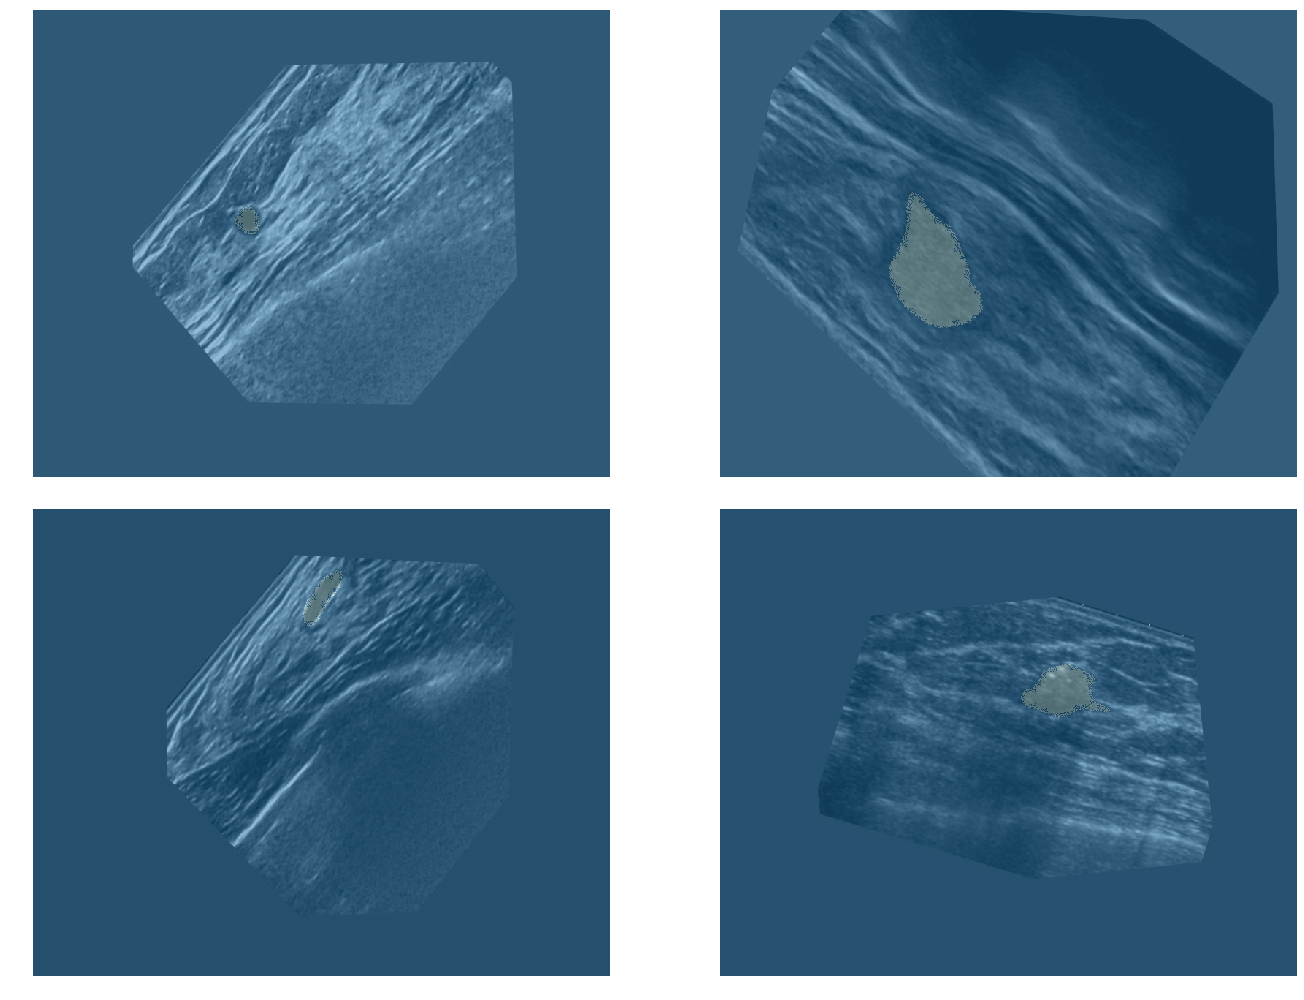

In [17]:
data.show_batch(10, figsize=(20,14))

In [17]:
data

ImageDataBunch;

Train: LabelList (5216 items)
x: MySegmentationItemList
Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790)
y: MySegmentationLabelList
ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790)
Path: /home/spriyanshu723/biomedical/size_Output;

Valid: LabelList (1304 items)
x: MySegmentationItemList
Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790)
y: MySegmentationLabelList
ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790)
Path: /home/spriyanshu723/biomedical/size_Output;

Test: None

In [19]:
for i in data.train_ds:
    print(np.unique(i[1].data))


[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


KeyboardInterrupt: 

In [ ]:
data.show_batch(10, figsize=(20,14), ds_type=DatasetType.Valid)

In [21]:
import cv2
img=cv2.imread('/home/spriyanshu723/biomedical/mask/000034_0_1565.jpg')
img_org=cv2.imread('/home/spriyanshu723/.fastai/data/camvid/images/0001TP_009150.png')

255

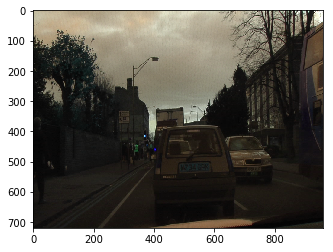

In [22]:
plt.imshow(img_org)
np.unique(torch.from_numpy(img))
img[232][475][0]

## Model

In [18]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['A']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [19]:
metrics=acc_camvid
#metrics=accuracy

In [20]:
wd=1e-2

In [21]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [24]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: MySegmentationItemList
Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790)
y: MySegmentationLabelList
ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790)
Path: /home/spriyanshu723/biomedical/size_Output;

Valid: LabelList (1304 items)
x: MySegmentationItemList
Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790)
y: MySegmentationLabelList
ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790)
Path: /home/spriyanshu723/biomedical/size_Output;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


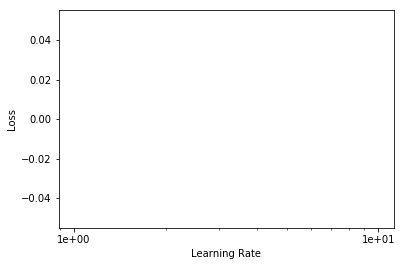

In [28]:
lr_find(learn)
learn.recorder.plot()

In [26]:
lr=1e-3

In [27]:
learn.fit_one_cycle(2, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.055838,0.035195,0.464070,22:27
1,0.035007,0.030693,0.604771,22:18


In [31]:
lr=3e-5

In [32]:
learn.fit_one_cycle(1, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.038309,0.030161,0.646216,22:15


In [33]:
learn.save('stage-4')

In [25]:
learn.load('stage-2');

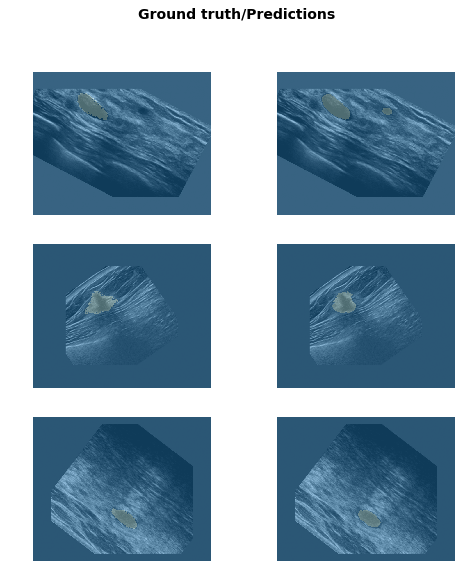

In [24]:
learn.show_results(rows=3, figsize=(8,9))

In [36]:
learn.unfreeze()

In [37]:
lrs = slice(lr/400,lr/4)

In [38]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.033142,0.028836,0.657141,25:31
1,0.037645,0.027381,0.681498,25:31


In [39]:
learn.save('stage-5');

In [49]:
lr=1e-4
lrs = slice(lr/400,lr/4)

In [50]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.024518,0.022316,0.759362,25:32
1,0.024150,0.022252,0.765578,25:32


In [52]:
learn.save('stage-7')

In [53]:
lr=1e-5
lrs = slice(lr/40,lr/4)

In [54]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.024956,0.022079,0.771997,25:32
1,0.024606,0.021564,0.782892,25:32


In [56]:
learn.save('stage-8')

In [57]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.021721,0.020695,0.763912,25:32
1,0.021693,0.020277,0.789097,25:32


In [60]:
learn.save('stage-9')

In [61]:
lr=1e-4
lrs = slice(lr/400,lr/4)

In [62]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.027409,0.021027,0.818817,25:32
1,0.020197,0.018746,0.820348,25:32


In [63]:
learn.save('stage-10')

In [66]:
lr=1e-6
lrs = slice(lr/400,lr/4)

In [67]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.019792,0.017992,0.812417,25:33
1,0.019378,0.017799,0.809922,25:32


In [69]:
learn.save('stage-11')

In [71]:
lr=1e-4
lrs = slice(lr/400,lr/4)

In [72]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.018816,0.017969,0.840797,25:33
1,0.018111,0.016337,0.837275,25:33


In [74]:
learn.save('stage-12')

In [75]:
lr=5e-4
lrs = slice(lr/4,lr)

In [76]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.023442,0.163282,0.795293,25:33
1,0.017436,0.015803,0.824653,25:34


In [79]:
learn.save('stage-13')

In [22]:
learn.load('stage-13')

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: MySegmentationItemList
Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790)
y: MySegmentationLabelList
ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790)
Path: /home/spriyanshu723/biomedical/size_Output;

Valid: LabelList (1304 items)
x: MySegmentationItemList
Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790),Image (3, 640, 790)
y: MySegmentationLabelList
ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790),ImageSegment (1, 640, 790)
Path: /home/spriyanshu723/biomedical/size_Output;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [25]:
lr=5e-5
lrs = slice(lr/400,lr/4)

In [26]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.019944,0.015676,0.806140,22:23
1,0.017490,0.015514,0.819719,22:24


In [27]:
learn.save('stage-14')

In [29]:
lr=5e-4
lrs = slice(lr/40,lr/4)

In [ ]:
learn.fit_one_cycle(2, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.016455,0.023233,0.809679,22:24


In [ ]:
learn.save('stage-15')

## Go big

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [ ]:
#learn.destroy() # uncomment once 1.0.46 is out

size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=3
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

In [ ]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [ ]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [ ]:
learn.load('stage-2');

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
lr=1e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

In [ ]:
learn.save('stage-1-big')

In [ ]:
learn.load('stage-1-big');

In [ ]:
learn.unfreeze()

In [ ]:
lrs = slice(1e-6,lr/10)

In [ ]:
learn.fit_one_cycle(10, lrs)

In [ ]:
learn.save('stage-2-big')

In [ ]:
learn.load('stage-2-big');

In [ ]:
learn.show_results(rows=3, figsize=(10,10))

## fin